## Librerias

In [2]:
# Importar paquetes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
#from scipy.stats import mannwhitneyu

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from pca import pca

#Librería para imputación múltiple
import miceforest as mf


import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
df = pd.read_excel("Data\BD_C19_DSA.xlsx")
df.head()

,Hombre,Edad (años),Lugar de atención,Nivel educativo,Afiliación SGSSS,Indice de Charlson,Embarazo_si_no,Sintomas_n,Disnea,TAM,...,Disfonia,Sincope,Estertores,Roncus,Sibilancias,Tirajes,Hipoventilacion,Deshidratacion,Rx_ingreso_Con_alteraciones_si_no,Gravedad del COVID-19
0,1,52,Pereira,Sin informacion,Contributivo,1,0,5,1,108.666667,...,0,0,1,0,0,0,1,0,1,Neumonia grave
1,0,71,Pereira,Sin informacion,Contributivo,3,0,3,1,112.666667,...,0,0,1,0,0,0,1,0,1,Neumonia grave
2,0,28,Pereira,Sin informacion,Contributivo,0,0,10,1,101.000000,...,0,0,1,0,0,0,1,0,1,Enfermedad no complicada
3,0,40,Pereira,Profesional,Contributivo,0,0,2,0,113.666667,...,0,0,0,0,0,0,0,0,0,Enfermedad no complicada
4,1,46,Pereira,Secundaria,Contributivo,0,0,7,0,93.333333,...,0,0,0,0,0,0,0,0,1,Neumonia leve


In [5]:
df.shape

(774, 118)

In [6]:
df.columns

Index(['Hombre', 'Edad (años)', 'Lugar de atención', 'Nivel educativo',
       'Afiliación SGSSS', 'Indice de Charlson', 'Embarazo_si_no',
       'Sintomas_n', 'Disnea', 'TAM',
       ...
       'Disfonia', 'Sincope', 'Estertores', 'Roncus', 'Sibilancias', 'Tirajes',
       'Hipoventilacion', 'Deshidratacion',
       'Rx_ingreso_Con_alteraciones_si_no', 'Gravedad del COVID-19'],
      dtype='object', length=118)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Columns: 118 entries, Hombre to Gravedad del COVID-19
dtypes: float64(12), int64(102), object(4)
memory usage: 713.7+ KB


In [8]:
for column in df.columns:
    print(column)

Hombre
Edad (años)
Lugar de atención
Nivel educativo
Afiliación SGSSS
Indice de Charlson
Embarazo_si_no
Sintomas_n
Disnea
TAM
FC ingreso
FR ingreso
T ingreso
Sat02 ingreso
Conciencia_alterada
CURB-65_calculado
Score News2_calculado
Oxigeno suplementario
Posición del paciente en prono
Complicaciones_n
Complicaciones_si_no
Hb ingreso
Hto ingreso
Leucocitos ingreso
Neutrofilos n absoluto ingreso
Linfocitos n absoluto ingreso
Plaquetas ingreso
Creatinina ingreso
Con_alteraciones_si_no
Ingreso a UCI
Muerto_si_no
Accidente cerebrovascular
Artritis reumatoide
Asma
Cardiopatia isquemica
Cirrosis/enfermedad hepática crónica
Demencia
Diabetes mellitus
Dislipidemia
Enfermedad de Parkinson
Enfermedad renal crónica
Enfermedad valvular
EPOC
Falla cardiaca
Hipertensión arterial
Hipotiroidismo
Lupus eritematoso sistémico
Neoplasia hematológica
Neoplasia sólida
Obesidad
Tabaquismo
Taquiarritmias supraventriculares
Transplantes
VIH
SAHOS
Epilepsia
HPB
TVP
Trastornos psiquiatricos
IECA/ARA2_si_no
Otros a

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hombre,774.0,0.614987,0.486913,0.0,0.0,1.0,1.0,1.0
Edad (años),774.0,56.891473,16.673521,19.0,45.0,57.0,68.0,100.0
Indice de Charlson,774.0,2.042636,2.018541,0.0,0.0,2.0,3.0,11.0
Embarazo_si_no,774.0,0.018088,0.133355,0.0,0.0,0.0,0.0,1.0
Sintomas_n,774.0,4.099483,1.701282,1.0,3.0,4.0,5.0,10.0
...,...,...,...,...,...,...,...,...
Sibilancias,774.0,0.029716,0.169912,0.0,0.0,0.0,0.0,1.0
Tirajes,774.0,0.073643,0.261359,0.0,0.0,0.0,0.0,1.0
Hipoventilacion,774.0,0.218346,0.413391,0.0,0.0,0.0,0.0,1.0
Deshidratacion,774.0,0.040052,0.196207,0.0,0.0,0.0,0.0,1.0


In [10]:
#Solo variables cuantitativas
df.describe(exclude=['object']).T

,count,mean,std,min,25%,50%,75%,max
Hombre,774.0,0.614987,0.486913,0.0,0.0,1.0,1.0,1.0
Edad (años),774.0,56.891473,16.673521,19.0,45.0,57.0,68.0,100.0
Indice de Charlson,774.0,2.042636,2.018541,0.0,0.0,2.0,3.0,11.0
Embarazo_si_no,774.0,0.018088,0.133355,0.0,0.0,0.0,0.0,1.0
Sintomas_n,774.0,4.099483,1.701282,1.0,3.0,4.0,5.0,10.0
...,...,...,...,...,...,...,...,...
Sibilancias,774.0,0.029716,0.169912,0.0,0.0,0.0,0.0,1.0
Tirajes,774.0,0.073643,0.261359,0.0,0.0,0.0,0.0,1.0
Hipoventilacion,774.0,0.218346,0.413391,0.0,0.0,0.0,0.0,1.0
Deshidratacion,774.0,0.040052,0.196207,0.0,0.0,0.0,0.0,1.0


### Verificando si hay datos nulos

In [11]:
print(df.isnull().any())
print('Variables con faltantes:',df.isnull().any().sum())

Hombre                               False
Edad (años)                          False
Lugar de atención                    False
Nivel educativo                      False
Afiliación SGSSS                     False
                                     ...  
Tirajes                              False
Hipoventilacion                      False
Deshidratacion                       False
Rx_ingreso_Con_alteraciones_si_no    False
Gravedad del COVID-19                False
Length: 118, dtype: bool
Variables con faltantes: 12


In [13]:
#Verificando cantidad y porcentaje de nulos en los predictores
def tablanull(df):
    Nvalues = pd.DataFrame(df.isnull().sum())
    Nvalues[1] = round((Nvalues[0]/len(df)*100),2)
    Nvalues.columns = ['Nulos Totales','Porcentaje de Nulos']
    Nvalues = Nvalues[Nvalues['Nulos Totales'] > 0] # filter out rows with zero null values
    Nvalues = Nvalues.sort_values(by='Porcentaje de Nulos', ascending=False)
    return Nvalues
tablanull(df)

,Nulos Totales,Porcentaje de Nulos
Creatinina ingreso,151,19.51
Linfocitos n absoluto ingreso,109,14.08
Neutrofilos n absoluto ingreso,97,12.53
Hb ingreso,80,10.34
Hto ingreso,80,10.34
Plaquetas ingreso,80,10.34
Leucocitos ingreso,79,10.21
T ingreso,33,4.26
TAM,25,3.23
FR ingreso,24,3.10


### Variables categóricas

In [16]:
df.Hombre

0      1
1      0
2      0
3      0
4      1
      ..
769    0
770    1
771    1
772    1
773    1
Name: Hombre, Length: 774, dtype: int64

In [18]:
base_cat = df.select_dtypes(exclude=['int', 'float']) #seleccionamos solo las variables categóricas para ver sus frecuencias
for col in base_cat.columns:
    print("\n"+'\033[1m' + col + '\033[0m' + "\n") #poner negrita en cada nombre de variable
    print(base_cat[col].unique()) # categorías únicas dentro de cada variable
    print(base_cat[col].value_counts())
    print("Valores perdidos:", base_cat[col].isnull().sum()) #verificamos perdidos x v/ble


Lugar de atención

['Pereira' 'Bogotá' 'Cali' 'Popayan']
Lugar de atención
Bogotá     304
Cali       302
Pereira     96
Popayan     72
Name: count, dtype: int64
Valores perdidos: 0

Nivel educativo

['Sin informacion' 'Profesional' 'Secundaria' 'Primaria' 'Tecnico'
 'Postgrado' 'secundaria ' 'secundaria' 'primaria']
Nivel educativo
Sin informacion    604
Secundaria          41
Profesional         39
Primaria            35
Tecnico             27
secundaria          20
secundaria           4
Postgrado            2
primaria             2
Name: count, dtype: int64
Valores perdidos: 0

Afiliación SGSSS

['Contributivo' 'Otro' 'Subsidiado' 'Sin información']
Afiliación SGSSS
Contributivo       670
Subsidiado          92
Otro                11
Sin información      1
Name: count, dtype: int64
Valores perdidos: 0

Gravedad del COVID-19

['Neumonia grave' 'Enfermedad no complicada' 'Neumonia leve']
Gravedad del COVID-19
Neumonia grave              427
Enfermedad no complicada    181
Neumonia le

### Variables dicotómicas y cuantitativas

In [19]:
base_cont = df.select_dtypes(include=['int', 'float']) #seleccionamos solo las variables numéricas
for col in base_cont.columns:
    print("\n"+'\033[1m' + col + '\033[0m' + "\n") #poner negrita en cada nombre de variable
    print(base_cont[col].value_counts())
    print("Valores perdidos:", base_cont[col].isnull().sum()) #verificamos perdidos x v/ble


Hombre

Hombre
1    476
0    298
Name: count, dtype: int64
Valores perdidos: 0

Edad (años)

Edad (años)
54    26
60    24
53    23
56    23
65    22
      ..
94     2
88     2
22     2
21     2
95     1
Name: count, Length: 77, dtype: int64
Valores perdidos: 0

Indice de Charlson

Indice de Charlson
0     211
1     168
2     131
3     104
4      62
5      49
6      25
8      12
7       7
11      2
10      2
9       1
Name: count, dtype: int64
Valores perdidos: 0

Embarazo_si_no

Embarazo_si_no
0    760
1     14
Name: count, dtype: int64
Valores perdidos: 0

Sintomas_n

Sintomas_n
4     167
3     159
5     154
2     107
6      76
7      53
1      36
8      18
9       3
10      1
Name: count, dtype: int64
Valores perdidos: 0

Disnea

Disnea
1    523
0    251
Name: count, dtype: int64
Valores perdidos: 0

TAM

TAM
96.666667     27
93.333333     25
83.333333     24
86.666667     23
90.000000     23
              ..
144.000000     1
114.666667     1
111.000000     1
112.333333     1
85.33

### Matriz de correlación

Matriz de correlación


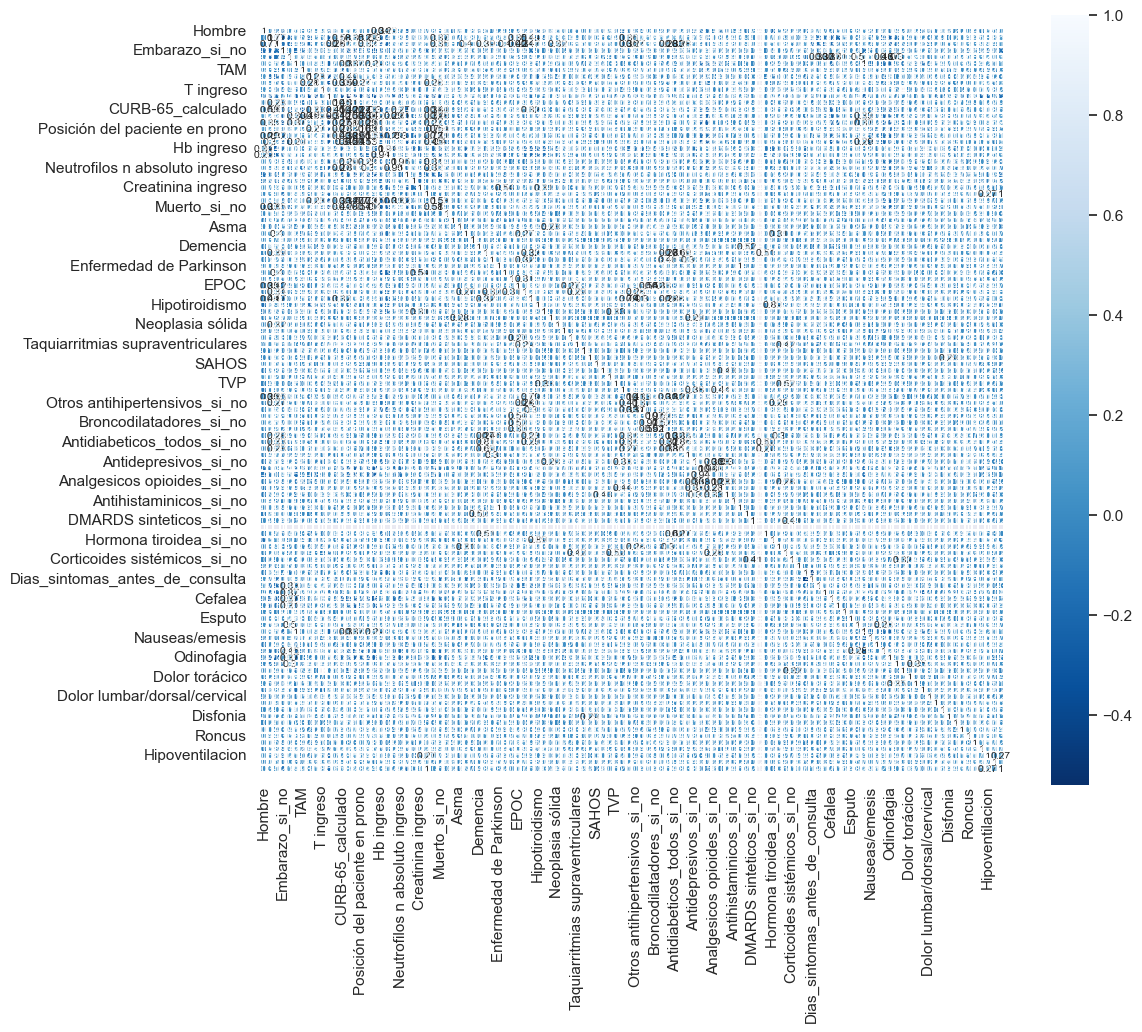

In [20]:
# Verificamos la correlación de la variables.
print('Matriz de correlación')
matriz = pd.DataFrame(base_cont).corr(method='pearson').round(2)

sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(matriz, annot=True, annot_kws={'size': 7.5}, square=True, linewidths=0.1, linecolor="white", cmap="Blues_r")

plt.show()